<a href="https://colab.research.google.com/github/beepmo/gator/blob/main/data/07-26/YcutDC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install impedance -q


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 48.4/48.4 kB 799.6 kB/s eta 0:00:00


In [2]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from google.colab import userdata
import plotly.express as px
from impedance import preprocessing
from impedance.models.circuits import CustomCircuit

In [3]:
!git config --global user.email {userdata.get('email')}
!git config --global user.name {userdata.get('name')}
!git clone https://{userdata.get('token')}@github.com/beepmo/gator
%pwd

Cloning into 'gator'...
remote: Enumerating objects: 1210, done.
remote: Counting objects: 100% (500/500), done.
remote: Compressing objects: 100% (316/316), done.
remote: Total 1210 (delta 316), reused 279 (delta 177), pack-reused 710
Receiving objects: 100% (1210/1210), 76.55 MiB | 7.28 MiB/s, done.
Resolving deltas: 100% (685/685), done.
Updating files: 100% (160/160), done.


'/content'

In [4]:
%cd "/content/gator/data/07-26/"

/content/gator/data/07-26


In [5]:
# prompt: delete first 8 lines from full_buffer.csv

def prep_csv(filename):

  # Read the full buffer into a list of lines
  with open(filename, 'r') as f:
    lines = f.readlines()

  # print base time
  print(lines[2])

  # Delete the first 8 lines
  lines = lines[8:]

  # Write the remaining lines back to the file
  with open(filename, 'w') as f:
    f.writelines(lines)

# Sample 1

(Joan doesn't know sample names yet, going off conductivities. This sample is not covered in gate set-up.)

Applying constant 1V showed 1e11 Ω overall conductivity, with ionic contribution.

In [6]:
prep_csv('constvolt1.csv')
df = pd.read_csv('constvolt1.csv')


Fill Mode,1



In [7]:
df

Reading    Unit  Range Digits  Disp Digits Math Start Group  \
0     -9.188185e-11  Amp DC  1.000000e-08          5.5    F           F   
1     -9.323960e-11  Amp DC  1.000000e-08          5.5    F           F   
2     -9.553734e-11  Amp DC  1.000000e-08          5.5    F           F   
3     -8.970243e-11  Amp DC  1.000000e-08          5.5    F           F   
4     -9.603175e-11  Amp DC  1.000000e-08          5.5    F           F   
...             ...     ...           ...          ...  ...         ...   
93722 -2.190769e-11  Amp DC  1.000000e-08          5.5    F           F   
93723 -2.886955e-11  Amp DC  1.000000e-08          5.5    F           F   
93724 -2.742149e-11  Amp DC  1.000000e-08          5.5    F           F   
93725 -2.411460e-11  Amp DC  1.000000e-08          5.5    F           F   
93726 -2.923157e-11  Amp DC  1.000000e-08          5.5    F           F   

      Limit1 High Limit1 Low Limit2 High Limit2 Low  ... Questionable Origin  \
0               F          F           F          F  ...            F   Main   
1               F          F           F          F  ...            F   Main   
2               F          F           F          F  ...            F   Main   
3               F          F           F          F  ...            F   Main   
4               F          F           F          F  ...            F   Main   
...           ...        ...         ...        ...  ...          ...    ...   
93722           F          F           F          F  ...            F   Main   
93723           F          F           F          F  ...            F   Main   
93724           F          F           F          F  ...            F   Main   
93725           F          F           F          F  ...            F   Main   
93726           F          F           F          F  ...            F   Main   

          Value   Unit.1 Digits  Output Sense Source Limit Overtemp  \
0      0.000003  Volt DC   0.01       F    2W            F        F   
1      0.000003  Volt DC   0.01       F    2W            F        F   
2      0.000002  Volt DC   0.01       F    2W            F        F   
3      0.000003  Volt DC   0.01       F    2W            F        F   
4      0.000003  Volt DC   0.01       F    2W            F        F   
...         ...      ...    ...     ...   ...          ...      ...   
93722  0.000018  Volt DC   1.00       F    2W            F        F   
93723  0.000018  Volt DC   1.00       F    2W            F        F   
93724  0.000017  Volt DC   1.00       F    2W            F        F   
93725  0.000018  Volt DC   1.00       F    2W            F        F   
93726  0.000015  Volt DC   1.00       F    2W            F        F   

      Relative Time  
0          0.000000  
1          0.069426  
2          0.138762  
3          0.208116  
4          0.277463  
...             ...  
93722   6501.057159  
93723   6501.126491  
93724   6501.195829  
93725   6501.265170  
93726   6501.334505  

[93727 rows x 21 columns]

In [8]:
fig = px.scatter(df, x="Relative Time", y=["Reading"])
fig.show()


# $R_{\text{ion}}C^\delta$

$$D^{\delta}=\frac{4L^2}{\pi  ^{2}(R_{\text{ion}}+R_{\text{eon}})C^{\delta} }<\frac{4L^2}{\pi  ^{2}(R_{\text{ion}})C^{\delta} }\sim 1\cdot 10^{-10} \mathrm{\frac{m^{2}}{s}}$$

In [9]:

T = df['Relative Time'].values
V = df['Value'].values
I = df['Reading'].values

<ipython-input-10-962455b14ffd>:1: RuntimeWarning:

divide by zero encountered in log

<ipython-input-10-962455b14ffd>:1: RuntimeWarning:

invalid value encountered in log



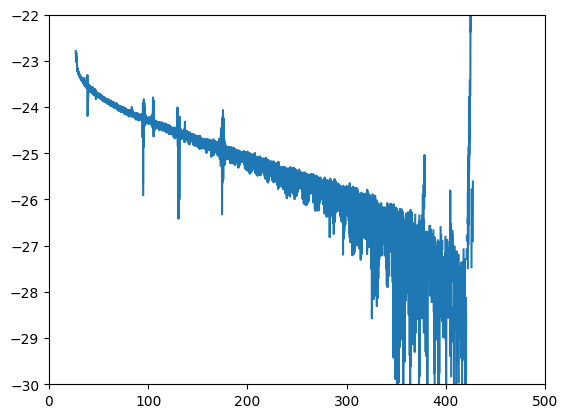

(0.0, 500.0)

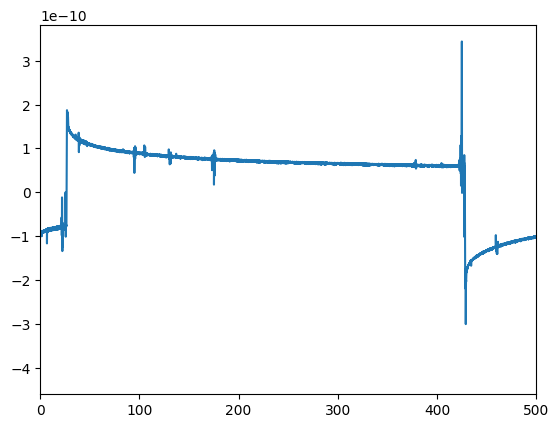

In [10]:
plt.plot(T,np.log(I-I[6000]*np.ones_like(I)))
plt.xlim(0,500)
plt.ylim(-30,-22)
plt.show()
plt.plot(T,I)
plt.xlim(0,500)
# plt.ylim(-22,)

In [11]:
T[6000]
I[6000]

6.028109955647001e-11

$\tau$ around (26-23.5)/(350-30), less than 1e4 from before.

# Sample Miracle2

reached breakdown voltage, visibly jumped!

In [12]:
prep_csv('defbuffer1_0726_133939.csv')
df = pd.read_csv('defbuffer1_0726_133939.csv')


Fill Mode,1



In [14]:
df

Reading     Unit  Range Digits  Disp Digits Math Start Group  \
0      0.000698  Volt DC          0.01          5.5    F           F   
1     -0.011697  Volt DC          0.01          5.5    F           F   
2     -0.588801  Volt DC          1.00          5.5    F           F   
3     -0.834525  Volt DC          1.00          5.5    F           F   
4     -1.032078  Volt DC          1.00          5.5    F           F   
...         ...      ...           ...          ...  ...         ...   
79220  0.012101  Volt DC        100.00          5.5    F           F   
79221  0.012087  Volt DC        100.00          5.5    F           F   
79222  0.012074  Volt DC        100.00          5.5    F           F   
79223  0.011868  Volt DC        100.00          5.5    F           F   
79224  0.012416  Volt DC        100.00          5.5    F           F   

      Limit1 High Limit1 Low Limit2 High Limit2 Low  ... Questionable Origin  \
0               F          F           F          F  ...            F   Main   
1               F          F           F          F  ...            F   Main   
2               F          F           F          F  ...            F   Main   
3               F          F           F          F  ...            F   Main   
4               F          F           F          F  ...            F   Main   
...           ...        ...         ...        ...  ...          ...    ...   
79220           F          F           F          F  ...            F   Main   
79221           F          F           F          F  ...            F   Main   
79222           F          F           F          F  ...            F   Main   
79223           F          F           F          F  ...            F   Main   
79224           F          F           F          F  ...            F   Main   

              Value  Unit.1        Digits  Output Sense Source Limit Overtemp  \
0      6.716690e-08  Amp DC  1.000000e-02       T    2W            F        F   
1      6.160370e-08  Amp DC  1.000000e-02       T    2W            F        F   
2      5.604040e-08  Amp DC  1.000000e-02       T    2W            F        F   
3      5.882220e-08  Amp DC  1.000000e-02       T    2W            F        F   
4      5.256350e-08  Amp DC  1.000000e-02       T    2W            F        F   
...             ...     ...           ...     ...   ...          ...      ...   
79220 -9.440000e-10  Amp DC  1.000000e-08       F    2W            F        F   
79221 -9.348000e-10  Amp DC  1.000000e-08       F    2W            F        F   
79222 -9.334000e-10  Amp DC  1.000000e-08       F    2W            F        F   
79223 -9.405000e-10  Amp DC  1.000000e-08       F    2W            F        F   
79224 -9.367000e-10  Amp DC  1.000000e-08       F    2W            F        F   

      Relative Time  
0          0.000000  
1          0.069405  
2          0.286546  
3          0.355939  
4          0.425285  
...             ...  
79220   5578.053386  
79221   5578.122720  
79222   5578.192053  
79223   5578.261387  
79224   5578.330737  

[79225 rows x 21 columns]

In [13]:
fig = px.scatter(df, x="Relative Time", y=["Reading"])
fig.show()


In [15]:
fig = px.scatter(df, x="Relative Time", y=["Value"])
fig.show()
